# For KDDCUP99 dataset

In [1]:
#Importing package
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
#Importing train and test set
train_set = pd.read_csv("..\\dataset\\kddcup99-train.csv")
test_set = pd.read_csv("..\\dataset\\kddcup99-test.csv")


# DDOS Attack SVM classifier

In [3]:
# One-class DDOS attack type train and test
train_ddos = train_set.copy()
test_ddos = test_set.copy()

#Converting ddos class to 'Yes' class and other classes to 'No' for ddos classifier
class_convert = {'ddos':'ddos','probe':'Not ddos','u2r':'Not ddos','r2l':'Not ddos','normal':'Not ddos'}

train_ddos['label'] = train_ddos.label.map(class_convert)
test_ddos['label'] = test_ddos.label.map(class_convert)


In [4]:
#Seperating the features and output
X_train_ddos = train_ddos.iloc[:,:-1].values
y_train_ddos = train_ddos.iloc[:,-1].values

X_test_ddos = test_ddos.iloc[:,:-1].values
y_test_ddos = test_ddos.iloc[:,-1].values


In [5]:
#One-class SVM classifier with gaussian kernel
from sklearn.svm import SVC
ddos_classifier = SVC(kernel='rbf')
ddos_classifier.fit(X_train_ddos,y_train_ddos)


SVC()

In [6]:
#Predictions
y_pred_ddos = ddos_classifier.predict(X_test_ddos)


In [7]:
#Confusion matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("One-class DDOS attack classifier")
print()
print(confusion_matrix(y_test_ddos, y_pred_ddos))
print()
print(classification_report(y_test_ddos, y_pred_ddos))


One-class DDOS attack classifier

[[ 9253     6]
 [    2 34765]]

              precision    recall  f1-score   support

    Not ddos       1.00      1.00      1.00      9259
        ddos       1.00      1.00      1.00     34767

    accuracy                           1.00     44026
   macro avg       1.00      1.00      1.00     44026
weighted avg       1.00      1.00      1.00     44026



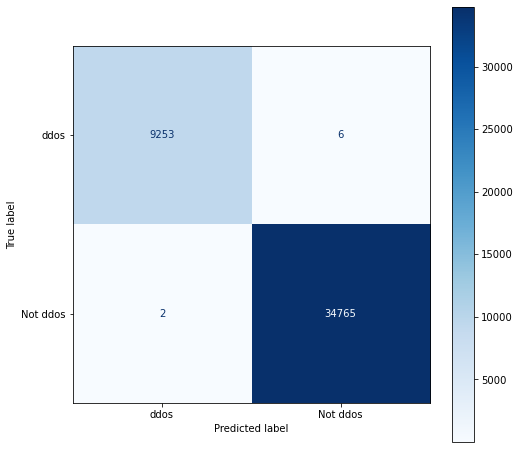

In [8]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=8,8
plot_confusion_matrix(ddos_classifier,X_test_ddos,y_test_ddos,display_labels = test_ddos['label'].unique(),cmap=plt.cm.Blues)
plt.show()

# 4-Class Attack type SVM classifier

In [9]:
# Segregating the 4 attack classes from the original dataset 
train_class4 = train_set[train_set["label"]!="ddos"].copy()
test_class4 = test_set[test_set["label"]!="ddos"].copy()


In [10]:
test_class4["label"].unique()


array(['normal', 'r2l', 'probe', 'u2r'], dtype=object)

In [11]:
#Seperating the features and output
X_train_class4 = train_class4.iloc[:,:-1].values
y_train_class4 = train_class4.iloc[:,-1].values

X_test_class4 = test_class4.iloc[:,:-1].values
y_test_class4 = test_class4.iloc[:,-1].values


In [12]:
#4-class SVM classifier with gaussian kernel
from sklearn.svm import SVC
class4_classifier = SVC(kernel='rbf')
class4_classifier.fit(X_train_class4,y_train_class4)


SVC()

In [13]:
#Predictions
y_pred_class4 = class4_classifier.predict(X_test_class4)


In [14]:
#Confusion matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("4-class DDOS attack type classifier")
print()
print(confusion_matrix(y_test_class4, y_pred_class4))
print()
print(classification_report(y_test_class4, y_pred_class4))


4-class DDOS attack type classifier

[[8754    2    5    1]
 [   7  377    0    0]
 [  25    0   77    0]
 [   6    0    1    4]]

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      8762
       probe       0.99      0.98      0.99       384
         r2l       0.93      0.75      0.83       102
         u2r       0.80      0.36      0.50        11

    accuracy                           0.99      9259
   macro avg       0.93      0.77      0.83      9259
weighted avg       0.99      0.99      0.99      9259



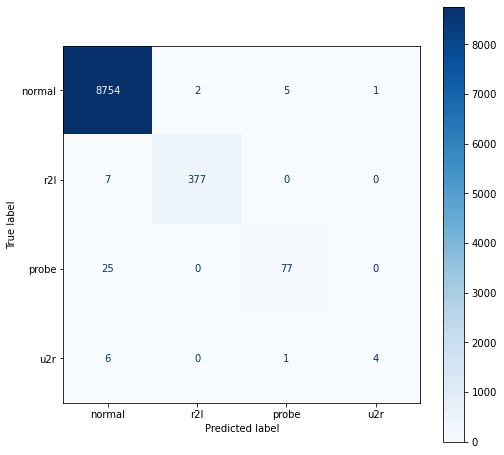

In [15]:
plot_confusion_matrix(class4_classifier,X_test_class4,y_test_class4,display_labels = test_class4['label'].unique(),cmap=plt.cm.Blues)
plt.show()

# 4-class SVM classifier predictions of DDOS classifier results

In [16]:
#Copying the original label to ddos test set
attack_ch = np.array(test_set['label'])
test_ddos['label2'] = attack_ch


In [17]:
#Putting the predictions from the first classifier into the test set for the 2nd classsifier
test_ddos['label3'] = y_pred_ddos


In [18]:
test_ddos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label2,label3
0,0.000000,0.0,0.052632,0.714286,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,...,0.00,1.00,0.00,0.0,0.0,0.0,0.0,ddos,ddos,ddos
1,0.000000,0.0,0.052632,0.714286,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,...,0.00,1.00,0.00,0.0,0.0,0.0,0.0,ddos,ddos,ddos
2,0.000017,0.5,0.736842,0.714286,8.408141e-07,0.000064,0.0,0.0,0.0,0.0,...,0.05,0.01,0.01,0.0,0.0,0.0,0.0,Not ddos,normal,Not ddos
3,0.045089,1.0,0.631579,0.714286,2.120063e-07,0.000020,0.0,0.0,0.0,0.0,...,0.85,1.00,0.00,0.0,0.0,0.0,0.0,Not ddos,normal,Not ddos
4,0.000000,0.0,0.052632,0.714286,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,...,0.00,1.00,0.00,0.0,0.0,0.0,0.0,ddos,ddos,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44021,0.000000,0.0,0.052632,0.714286,7.499542e-07,0.000000,0.0,0.0,0.0,0.0,...,0.00,1.00,0.00,0.0,0.0,0.0,0.0,ddos,ddos,ddos
44022,0.000000,0.0,0.052632,0.714286,7.499542e-07,0.000000,0.0,0.0,0.0,0.0,...,0.00,1.00,0.00,0.0,0.0,0.0,0.0,ddos,ddos,ddos
44023,0.302422,1.0,0.631579,0.714286,2.105641e-07,0.000020,0.0,0.0,0.0,0.0,...,0.87,0.99,0.00,0.0,0.0,0.0,0.0,Not ddos,normal,Not ddos
44024,0.000000,0.5,1.000000,1.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.0,1.0,0.0,0.0,ddos,ddos,ddos


In [19]:
#Set for prediction for the second classifier.
real_ch = test_ddos[test_ddos['label3']=='Not ddos']
x_real_ch_test = real_ch.iloc[:,:-3].values
y_real_ch_test = real_ch.iloc[:,-2].values

#False positives from DDOS SVM classifier
real_ch[real_ch['label2']=="ddos"]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label2,label3
19729,0.0,1.0,0.684211,0.714286,4.038215e-08,0.000000,0.0,0.333333,0.0,0.000000,...,0.01,0.27,0.0,0.0,0.0,0.0,0.0,ddos,ddos,Not ddos
33073,0.0,0.5,0.315789,0.714286,7.865866e-05,0.001613,0.0,0.000000,0.0,0.066667,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,ddos,ddos,Not ddos


In [20]:
y_real_ch_pred = class4_classifier.predict(x_real_ch_test)

print(np.unique(y_real_ch_test))
print()
print(np.unique(y_real_ch_pred))

['ddos' 'normal' 'probe' 'r2l' 'u2r']

['normal' 'probe' 'r2l' 'u2r']


In [21]:
#Confusion matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("4-class DDOS attack type classifier")
print()
print(confusion_matrix(y_real_ch_test, y_real_ch_pred))
print()
print(classification_report(y_real_ch_test, y_real_ch_pred,zero_division=0))


4-class DDOS attack type classifier

[[   0    1    0    1    0]
 [   0 8749    2    5    1]
 [   0    7  377    0    0]
 [   0   25    0   77    0]
 [   0    5    0    1    4]]

              precision    recall  f1-score   support

        ddos       0.00      0.00      0.00         2
      normal       1.00      1.00      1.00      8757
       probe       0.99      0.98      0.99       384
         r2l       0.92      0.75      0.83       102
         u2r       0.80      0.40      0.53        10

    accuracy                           0.99      9255
   macro avg       0.74      0.63      0.67      9255
weighted avg       0.99      0.99      0.99      9255



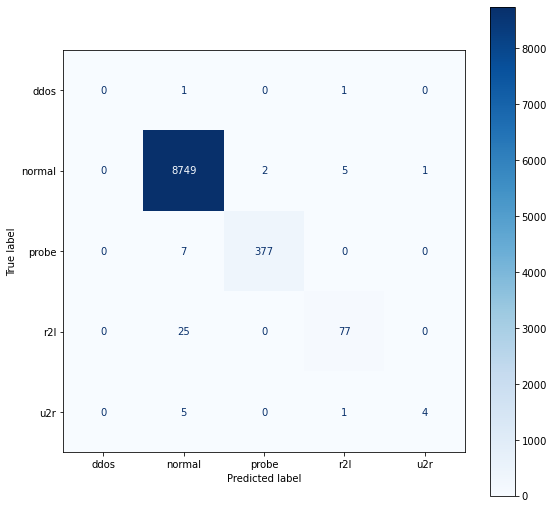

In [22]:
plt.rcParams['figure.figsize']=9,9
plot_confusion_matrix(class4_classifier,x_real_ch_test,y_real_ch_test,display_labels = np.unique(y_real_ch_test),cmap=plt.cm.Blues)
plt.show()